In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, 'Spread of Infection')

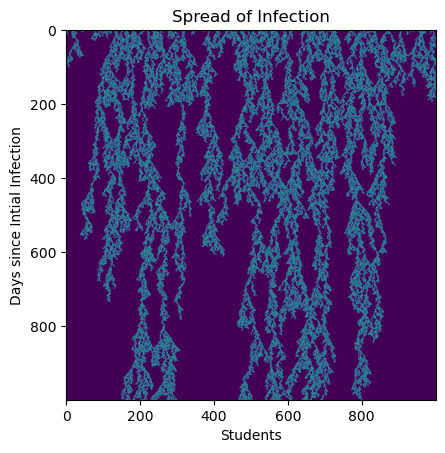

In [2]:
# simulate the infection given an initial array and probability of infection
# assumes 0.15 probability of sickness on first day
def infection_simulation(infection_array, probability):
    # apply probability of sickness to first day
    infection_array[0, : ] = np.random.choice([0, 1], size=infection_array.shape[0], p=[0.85, 0.15])

    # apply the infection to each day after the first day
    for day in range(1, infection_array.shape[0]):
        for student in range(infection_array.shape[1]):
            infection_spread(day, student, infection_array, probability)

# function model for the spread of the infection
def infection_spread(i, j, array, probability):
    curr_student_prev_day = array[i - 1, j]
    
    if (j == 0): # if the current index is leftmost, only check right neighbor
        if((array[i - 1, j + 1] == 1) and (curr_student_prev_day != 1)):
            array[i, j] = rnd.choices([0, 1], [1 - probability, probability])[0]
        else:
            array[i, j] = 0
    elif (j == array.shape[1] - 1): # if the current index is rightmost, only check left neighbor
        if((array[i - 1, j - 1] == 1) and (curr_student_prev_day != 1)):
            array[i, j] = rnd.choices([0, 1], [1 - probability, probability])[0]
        else:
            array[i, j] = 0
    else: # check left and right neighbors
        if((array[i - 1, j + 1] == 1 or array[i - 1, j - 1] == 1) and (curr_student_prev_day != 1)):
            array[i, j] = rnd.choices([0, 1], [1 - probability, probability])[0]
        else:
            array[i, j] = 0

array = np.zeros((1000, 1000), dtype=int)
infection_simulation(array, 0.7)
plt.imshow(array, cmap='viridis')
plt.xlabel("Students")
plt.ylabel("Days since Intial Infection")
plt.title("Spread of Infection")

# Beginning at a probability of infection of about 0.70 and beyond, the disease persists without simply dying out.

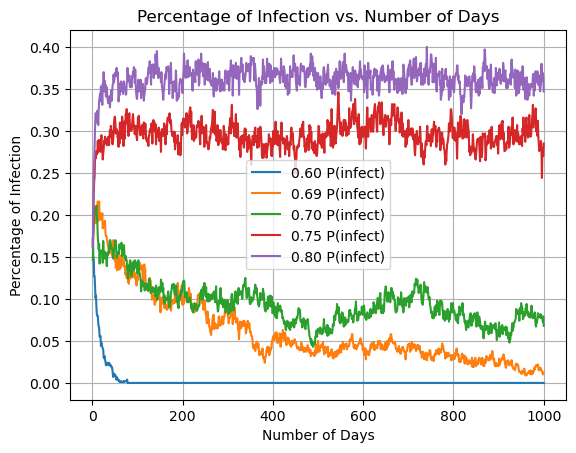

In [3]:
# simulate 0.6 infection probability
array_one = np.zeros((1000, 1000), dtype=int)
infection_simulation(array_one, 0.6)

# simulate 0.69 infection probability
array_two = np.zeros((1000, 1000), dtype=int)
infection_simulation(array_two, 0.69)

# simulate 0.7 infection probability
array_three = np.zeros((1000, 1000), dtype=int)
infection_simulation(array_three, 0.7)

# simulate 0.75 infection probability
array_four = np.zeros((1000, 1000), dtype=int)
infection_simulation(array_four, 0.75)

# simulate 0.8 infection probability
array_five = np.zeros((1000, 1000), dtype=int)
infection_simulation(array_five, 0.8)

# calculate %s for each day and plot the curve
def plot_percentage(infection_array, probability):
    # get % of students that are sick for each day
    frequency = infection_array.sum(axis=1)
    num_students = infection_array.shape[1]
    percentages = np.divide(frequency, num_students)

    days = [i for i in range(1, 1001)]
    x = np.array(days)
    y = percentages
    plt.plot(x,y,label= probability + " P(infect)")

# plot curve for 0.60, 0.69, 0.7, 0.75, 0.80 infection probability
plot_percentage(array_one, "0.60")
plot_percentage(array_two, "0.69")
plot_percentage(array_three, "0.70")
plot_percentage(array_four, "0.75")
plot_percentage(array_five, "0.80")

plt.xlabel("Number of Days")
plt.ylabel("Percentage of Infection")
plt.title("Percentage of Infection vs. Number of Days")
plt.legend()
plt.grid(True)